# Planteamiento del problema
Escenario: Uno de nuestros clientes dedicado a embotellar refrescos quiere

prevenir la posible falla de sus equipos y
tener una visibilidad del consumo de uno de sus equipos.
Para esto el equipo de Data Science deberá realizar una propuesta de una propuesta de cómo poder obtener estas predicciones utilizando modelos de Machine Learning o estadístico. El equipo necesita que tú realices:

un EDA y
Proponer un modelo para cada caso que permita realizar predicciones a futuro de las variables de la maquinaria del cliente.
Cómo funcionará es, se tienen lecturas de las variables de entrada del modelo, y con estas lecturas poder predecir la variable de salida a futuro.

# descripcion de variables

Modelo 2. Son 17 variables

**Variables de entrada:**

* L2_Ench_B120_PIT:	Medida - PRESIÓN DE LLENADO - LLENADOR - Línea 2 [bar]]
* L2_Med_T_C2Mix:	Totalizador - Consumo de CO2 - Carbonatador - Línea 2 [kg]
* L2_Med_V_C2Mix:	Medición - Flujo instantáneo de CO2 - Carbonatador - Línea 2 [kg/h]
* L2_Mixer_KB_103_QIT:	Medida - Volumen de CO2 EN EL PRODUCTO - CARBONATOR - Línea 2 [Vol/Vol]
* L2_Mixer_KB_121_TT:	Medición - TEMPERATURA DEL AGUA ENFRIADA ENTRADA DEL INTERCAMBIADOR DE CALOR - Carbonatador - Línea 2 [°C]
* L2_Mixer_REC_ATV:	Información - RECETA ACTIVA - Carbonatador - Línea 2
* L3_Ench_VELOCIDADE:	Medida - VELOCIDAD - LLENADOR - Línea 3 [g/h]
* L3_Med_T_C2Mix:	Totalizador - Consumo de CO2 - Carbonatador - Línea 3 [kg]
* L3_Med_V_C2Mix:	Medición - Flujo instantáneo de CO2 - Carbonatador - Línea 3 [kg/h]
* L3_Mixer_KB_103_QIT:	Medida - Volumen de CO2 EN EL PRODUCTO - CARBONATOR - Línea 3 [Vol/Vol]
* L3_Mixer_KB_121_TT:	Medición - INTERCAMBIADOR DE CALOR DE TEMPERATURA DEL AGUA DE ENTRADA - Carbonatador - Línea 3 [°C]
* L3_Mixer_KB_140_TT:	Medición - TEMPERATURA DE ENTRADA DEL PRODUCTO - Carbonatador - Línea 3 [°C]
* L4_MED_T_C2MIX:	Totalizador - Consumo de CO2 - Carbonatador - Línea 4 [kg]
* L4_MED_V_C2MIX:	Medición - Flujo de CO2 - Carbonatador - Línea 4 [kg/h]
* L4_MIXER_KB_841_QIT:	Medida - Volumen de CO2 en el producto - Carbonatador - Línea 4 [Vol/Vol]

* Util_Vazao_FIT17_TOT:	Totalización - Consumo de N2 - Salida del tanque - Utilidades [kg]

**Variable de salida:**

* **Util_Vazao_FIT16_TOT:	Totalización - Consumo de CO2 - Salida del tanque - Utilidades [kg]**


In [ ]:
#cargar datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [ ]:
mod2_df = pd.read_pickle("/content/mod2_subset.pkl")
mod2_df

,equipo,time,smt,num
1309489,ETH_L2_Med_T_C2Mix,2022-12-31 04:17:47.000,0.000000e+00,3093108
1309490,ETH_L2_Med_T_C2Mix,2023-01-01 20:17:57.000,-2.147484e+09,3093126
1309491,ETH_L2_Med_T_C2Mix,2023-01-01 20:21:03.000,0.000000e+00,3093126
1309492,ETH_L2_Med_T_C2Mix,2023-01-02 17:45:19.000,-2.147484e+09,3093126
1309493,ETH_L2_Med_T_C2Mix,2023-01-02 17:46:58.000,0.000000e+00,3093126
...,...,...,...,...
7843040,ETH_L3_Mixer_KB_140_TT,2023-01-19 21:39:01.000,0.000000e+00,"12,22844"
7843041,ETH_L3_Mixer_KB_140_TT,2023-01-19 22:16:57.000,0.000000e+00,"13,73959"
7843042,ETH_L3_Mixer_KB_140_TT,2023-01-19 23:12:11.000,0.000000e+00,"12,233943939209"
7843043,ETH_L3_Mixer_KB_140_TT,2023-01-19 23:34:57.000,0.000000e+00,"13,7387084960938"


In [ ]:
data2=mod2_df.copy()

In [ ]:
data2['datetime'] = pd.to_datetime(data2['time']) #convertir columna a datetime de pandas
data2= data2.sort_values(by='datetime') #ordenar por fechas
data2.drop('time', axis=1, inplace=True)

data2['date'] = data2['datetime'].dt.date #creamos las columnas auxiliares que almacenan solo la fecha y la hora
data2['time'] = data2['datetime'].dt.time
data2['dia semana']= data2['datetime'].dt.day_name()

data2 = data2.set_index('datetime')

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5540969 entries, 2022-12-27 22:35:33 to 2023-01-23 12:25:49
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   equipo      object 
 1   smt         float64
 2   num         object 
 3   date        object 
 4   time        object 
 5   dia semana  object 
dtypes: float64(1), object(5)
memory usage: 295.9+ MB


In [ ]:
data2.equipo.value_counts()

ETH_L3_Mixer_KB_121_TT      1549803
ETH_Util_Vazao_FIT16_TOT    1457861
ETH_L3_Mixer_KB_103_QIT      646574
ETH_L4_MIXER_KB_841_QIT      596482
ETH_L2_Mixer_KB_103_QIT      532908
ETH_L3_Med_V_C2Mix           493690
ETH_L2_Ench_B120_PIT         117147
ETH_L4_MED_V_C2MIX           100534
ETH_L3_Ench_VELOCIDADE        33962
ETH_L2_Mixer_KB_121_TT         3885
ETH_L3_Med_T_C2Mix             2875
ETH_L3_Mixer_KB_140_TT         2838
ETH_L2_Med_T_C2Mix             2162
ETH_L4_MED_T_C2MIX              150
ETH_L2_Med_V_C2Mix               54
ETH_L2_Mixer_REC_ATV             28
ETH_Util_Vazao_FIT17_TOT         16
Name: equipo, dtype: int64

# Muestreo de mod2_subset

Como el dataset  para el modelo 2 es muy grande vamos a hacer obtener una muestra del  corresponiente al 10% de los datos para hacer el análisis

In [ ]:
#una forma
data2_sample=data2.sample(frac=0.1, random_state=13)

In [ ]:
data2_sample['equipo'].value_counts()

ETH_L3_Mixer_KB_121_TT      155027
ETH_Util_Vazao_FIT16_TOT    145840
ETH_L3_Mixer_KB_103_QIT      64657
ETH_L4_MIXER_KB_841_QIT      59314
ETH_L2_Mixer_KB_103_QIT      53531
ETH_L3_Med_V_C2Mix           49482
ETH_L2_Ench_B120_PIT         11787
ETH_L4_MED_V_C2MIX           10004
ETH_L3_Ench_VELOCIDADE        3264
ETH_L2_Mixer_KB_121_TT         382
ETH_L3_Mixer_KB_140_TT         293
ETH_L3_Med_T_C2Mix             278
ETH_L2_Med_T_C2Mix             212
ETH_L4_MED_T_C2MIX              17
ETH_L2_Med_V_C2Mix               3
ETH_L2_Mixer_REC_ATV             3
ETH_Util_Vazao_FIT17_TOT         3
Name: equipo, dtype: int64

In [ ]:
# otra forma para a segurar que se muestren todas las variables por igual
data2_sample2=pd.DataFrame(columns=['equipo','smt', 'num'])
sampled_dfs = []

for idx, equipo in enumerate(data2['equipo'].unique()):
  samp=data2[data2['equipo']==equipo].sample(frac=0.1, random_state=13)
  sampled_dfs.append(samp)

data2_sample2 = pd.concat(sampled_dfs)
data2_sample2['equipo'].value_counts()


ETH_L3_Mixer_KB_121_TT      154980
ETH_Util_Vazao_FIT16_TOT    145786
ETH_L3_Mixer_KB_103_QIT      64657
ETH_L4_MIXER_KB_841_QIT      59648
ETH_L2_Mixer_KB_103_QIT      53291
ETH_L3_Med_V_C2Mix           49369
ETH_L2_Ench_B120_PIT         11715
ETH_L4_MED_V_C2MIX           10053
ETH_L3_Ench_VELOCIDADE        3396
ETH_L2_Mixer_KB_121_TT         388
ETH_L3_Med_T_C2Mix             288
ETH_L3_Mixer_KB_140_TT         284
ETH_L2_Med_T_C2Mix             216
ETH_L4_MED_T_C2MIX              15
ETH_L2_Med_V_C2Mix               5
ETH_L2_Mixer_REC_ATV             3
ETH_Util_Vazao_FIT17_TOT         2
Name: equipo, dtype: int64

In [ ]:
# otra opcion seria hacer muestreo por fechas

# pero para este analisis nos quedamos con el muestreo aleatorio data2_sample

In [ ]:
data2_sample= data2_sample.sort_index()
data2_sample

,equipo,smt,num,date,time,dia semana
datetime,,,,,,
2022-12-31 12:52:02.000,ETH_L4_MED_V_C2MIX,0.0,"0,006721003",2022-12-31,12:52:02,Saturday
2022-12-31 18:26:35.270,ETH_L2_Ench_B120_PIT,0.0,"0,1270255",2022-12-31,18:26:35.270000,Saturday
2022-12-31 20:54:54.000,ETH_L3_Med_T_C2Mix,0.0,5477877,2022-12-31,20:54:54,Saturday
2023-01-01 00:00:01.000,ETH_L3_Mixer_KB_121_TT,0.0,"18,17472",2023-01-01,00:00:01,Sunday
2023-01-01 00:00:04.000,ETH_L3_Mixer_KB_121_TT,0.0,"18,21641",2023-01-01,00:00:04,Sunday
...,...,...,...,...,...,...
2023-01-19 23:59:56.000,ETH_L2_Mixer_KB_103_QIT,0.0,"7,587236",2023-01-19,23:59:56,Thursday
2023-01-20 00:00:00.000,ETH_Util_Vazao_FIT16_TOT,0.0,"6482,867",2023-01-20,00:00:00,Friday
2023-01-20 00:03:03.000,ETH_L2_Mixer_KB_121_TT,0.0,"10,7454",2023-01-20,00:03:03,Friday


In [ ]:
data2_sample.to_pickle('data2_sample.pkl')

# Análisis conjunto muestra


## Limpieza de datos y reacomodo

In [29]:
#cargar datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

data2_sample = pd.read_pickle("/content/data2_sample.pkl")


In [11]:
data2_sample

,equipo,smt,num,date,time,dia semana
datetime,,,,,,
2022-12-31 12:52:02.000,ETH_L4_MED_V_C2MIX,0.0,"0,006721003",2022-12-31,12:52:02,Saturday
2022-12-31 18:26:35.270,ETH_L2_Ench_B120_PIT,0.0,"0,1270255",2022-12-31,18:26:35.270000,Saturday
2022-12-31 20:54:54.000,ETH_L3_Med_T_C2Mix,0.0,5477877,2022-12-31,20:54:54,Saturday
2023-01-01 00:00:01.000,ETH_L3_Mixer_KB_121_TT,0.0,"18,17472",2023-01-01,00:00:01,Sunday
2023-01-01 00:00:04.000,ETH_L3_Mixer_KB_121_TT,0.0,"18,21641",2023-01-01,00:00:04,Sunday
...,...,...,...,...,...,...
2023-01-19 23:59:56.000,ETH_L2_Mixer_KB_103_QIT,0.0,"7,587236",2023-01-19,23:59:56,Thursday
2023-01-20 00:00:00.000,ETH_Util_Vazao_FIT16_TOT,0.0,"6482,867",2023-01-20,00:00:00,Friday
2023-01-20 00:03:03.000,ETH_L2_Mixer_KB_121_TT,0.0,"10,7454",2023-01-20,00:03:03,Friday


In [30]:
#por ahora vamos a eliminar las columna 'time' 
data2_sample.drop('time', axis=1, inplace=True)

### observamos la columna smt

In [4]:
#observamos la columna smt
print(data2_sample['smt'].value_counts())


 0.000000e+00    554088
-2.147484e+09         9
Name: smt, dtype: int64


In [31]:
# borramos esa columna
data2_sample.drop('smt', axis=1, inplace=True)

### convertir col num a flotante

In [17]:
data2_sample.dtypes

equipo        object
num           object
date          object
dia semana    object
dtype: object

In [18]:
data2_sample['num'].sample(n=15, random_state=21)

datetime
2023-01-17 12:33:04    3,010005
2023-01-05 12:11:34    1091,594
2023-01-19 03:42:57          55
2023-01-11 12:40:09    7,458662
2023-01-10 14:40:32    2316,918
2023-01-04 01:34:56    11303,05
2023-01-12 12:40:58    2745,952
2023-01-11 14:17:09    2435,507
2023-01-13 19:58:46    2174,211
2023-01-12 10:48:58    7,702875
2023-01-08 11:31:07    8,263929
2023-01-05 19:25:16     8,06862
2023-01-07 17:52:28    10,23634
2023-01-12 15:15:13     3864,77
2023-01-12 08:34:35    2461,909
Name: num, dtype: object

In [19]:
# ¿hay puntos en la columna num?
data2_sample['num'].str.findall(r'\.').sum()

[]

In [32]:
# cambiar las comas por puntos para poder convertir a flotante
data2_sample['num']=data2_sample['num'].str.replace(r',', r'.')
data2_sample['num']=data2_sample['num'].astype(float)
data2_sample['num'].sample(n=15, random_state=21) # comprobar que se hizo bien la transformacion

datetime
2023-01-17 12:33:04        3.010005
2023-01-05 12:11:34     1091.594000
2023-01-19 03:42:57       55.000000
2023-01-11 12:40:09        7.458662
2023-01-10 14:40:32     2316.918000
2023-01-04 01:34:56    11303.050000
2023-01-12 12:40:58     2745.952000
2023-01-11 14:17:09     2435.507000
2023-01-13 19:58:46     2174.211000
2023-01-12 10:48:58        7.702875
2023-01-08 11:31:07        8.263929
2023-01-05 19:25:16        8.068620
2023-01-07 17:52:28       10.236340
2023-01-12 15:15:13     3864.770000
2023-01-12 08:34:35     2461.909000
Name: num, dtype: float64

### Cambiar los nombres de las variables a letras mayusculas

In [33]:
data2_sample['equipo'] = data2_sample['equipo'].str.upper()

## Pivotear los datos por variable



In [125]:
pivotsample= data2_sample.pivot_table(index=data2_sample.index,
                    columns='equipo', 
                    values='num',
                    aggfunc='mean').reset_index()
# pivotsample = pivotsample[['ETH_UTIL_VAZAO_FIT16_TOT', 'ETH_L2_ENCH_B120_PIT', 'ETH_L2_MED_T_C2MIX','ETH_L2_MED_V_C2MIX',
#                            'ETH_L2_MIXER_KB_103_QIT', 'ETH_L2_MIXER_KB_121_TT','ETH_L2_MIXER_REC_ATV','ETH_L3_ENCH_VELOCIDADE',
#                            'ETH_L3_MED_T_C2MIX', 'ETH_L3_MED_V_C2MIX','ETH_L3_MIXER_KB_103_QIT','ETH_L3_MIXER_KB_121_TT',
#                            'ETH_L3_MIXER_KB_140_TT','ETH_L4_MED_T_C2MIX','ETH_L4_MED_V_C2MIX','ETH_L4_MIXER_KB_841_QIT',
#                            'ETH_UTIL_VAZAO_FIT17_TOT']]

pivotsample

equipo,datetime,L2_ENCH_B120_PIT,L2_MED_T_C2MIX,L2_MED_V_C2MIX,L2_MIXER_KB_103_QIT,L2_MIXER_KB_121_TT,L2_MIXER_REC_ATV,L3_ENCH_VELOCIDADE,L3_MED_T_C2MIX,L3_MED_V_C2MIX,L3_MIXER_KB_103_QIT,L3_MIXER_KB_121_TT,L3_MIXER_KB_140_TT,L4_MED_T_C2MIX,L4_MED_V_C2MIX,L4_MIXER_KB_841_QIT,UTIL_VAZAO_FIT16_TOT,UTIL_VAZAO_FIT17_TOT
0,2022-12-31 12:52:02.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006721,NaN,NaN,NaN
1,2022-12-31 18:26:35.270,0.127026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-12-31 20:54:54.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5477877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-01 00:00:01.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.17472,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-01 00:00:04.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.21641,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482737,2023-01-19 23:59:56.000,NaN,NaN,NaN,7.587236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482738,2023-01-20 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6482.867,NaN
482739,2023-01-20 00:03:03.000,NaN,NaN,NaN,NaN,10.7454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482740,2023-01-20 00:05:55.473,4.626085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
pivotsample.columns


Index(['datetime', 'L2_ENCH_B120_PIT', 'L2_MED_T_C2MIX', 'L2_MED_V_C2MIX',
       'L2_MIXER_KB_103_QIT', 'L2_MIXER_KB_121_TT', 'L2_MIXER_REC_ATV',
       'L3_ENCH_VELOCIDADE', 'L3_MED_T_C2MIX', 'L3_MED_V_C2MIX',
       'L3_MIXER_KB_103_QIT', 'L3_MIXER_KB_121_TT', 'L3_MIXER_KB_140_TT',
       'L4_MED_T_C2MIX', 'L4_MED_V_C2MIX', 'L4_MIXER_KB_841_QIT',
       'UTIL_VAZAO_FIT16_TOT', 'UTIL_VAZAO_FIT17_TOT'],
      dtype='object', name='equipo')

pivoteo usando como values promedio de num por día

In [55]:
pivotbydaymean= data2_sample.pivot_table(index='date',
                    columns='equipo', 
                    values='num',
                    aggfunc='mean')#.fillna(0)

pivotbydaymean

equipo,L2_ENCH_B120_PIT,L2_MED_T_C2MIX,L2_MED_V_C2MIX,L2_MIXER_KB_103_QIT,L2_MIXER_KB_121_TT,L2_MIXER_REC_ATV,L3_ENCH_VELOCIDADE,L3_MED_T_C2MIX,L3_MED_V_C2MIX,L3_MIXER_KB_103_QIT,L3_MIXER_KB_121_TT,L3_MIXER_KB_140_TT,L4_MED_T_C2MIX,L4_MED_V_C2MIX,L4_MIXER_KB_841_QIT,UTIL_VAZAO_FIT16_TOT,UTIL_VAZAO_FIT17_TOT
date,,,,,,,,,,,,,,,,,
2022-12-31,0.127026,NaN,NaN,NaN,NaN,NaN,NaN,5.477877e+06,NaN,NaN,NaN,NaN,NaN,0.006721,NaN,NaN,NaN
2023-01-01,0.062645,NaN,NaN,NaN,NaN,NaN,14003.000000,NaN,NaN,0.000000,19.824088,NaN,NaN,NaN,NaN,0.000161,NaN
2023-01-02,1.389706,NaN,NaN,0.000000,61.519631,14.0,16150.640000,5.478659e+06,3996.535546,8.408934,20.458936,47.797243,NaN,20.499480,3.459645,753.299421,0.0
2023-01-03,4.813850,3.094759e+06,1.050254,7.347693,10.841343,NaN,18254.483395,5.481921e+06,5113.900825,8.301376,12.407723,13.449628,117528.900000,29.951741,3.198390,4546.550938,0.0
2023-01-04,4.914683,3.098476e+06,NaN,7.529727,11.282889,NaN,17360.495146,5.489359e+06,5214.810106,8.209079,13.522057,29.814492,117628.900000,27.536738,1.005311,5803.250499,NaN
2023-01-05,4.854669,3.102718e+06,NaN,7.420520,10.653390,NaN,18641.821229,5.494409e+06,5439.438189,8.202867,18.935496,42.697366,117862.233333,29.412478,0.388129,3492.869040,NaN
2023-01-06,4.818408,3.105718e+06,NaN,5.932368,19.952799,NaN,17336.902597,5.499194e+06,4663.434990,8.267613,10.882254,12.180500,118028.900000,23.122404,0.383323,4288.642032,NaN
2023-01-07,5.019862,3.107565e+06,NaN,5.016002,10.785065,NaN,17988.101562,5.505419e+06,3553.348995,6.367431,14.240776,40.464591,NaN,25.259015,0.392946,3268.349652,NaN
2023-01-08,NaN,NaN,NaN,NaN,NaN,NaN,17918.782609,5.511646e+06,5470.414887,8.299557,11.634725,14.074565,118188.900000,23.859431,0.369665,3641.578715,NaN


#EDA del conjunto muestra

### ¿a qué línea pertenece la información?

In [36]:
# vamos a guardar la informacion de la linea en otra columna auxiliar
data2_sample['linea'] = data2_sample['equipo'].str.extract(r'(L\d)')

# vamos a quitar "ETH_" de la columna equipo
data2_sample['equipo'] = data2_sample['equipo'].str.replace(r'ETH_', '')


In [25]:
data2_sample = data2_sample[['linea','equipo', 'num', 'date','dia semana']]
data2_sample.head()

,linea,equipo,num,date
datetime,,,,
2022-12-31 12:52:02.000,L4,L4_MED_V_C2MIX,6.721003e-03,2022-12-31
2022-12-31 18:26:35.270,L2,L2_ENCH_B120_PIT,1.270255e-01,2022-12-31
2022-12-31 20:54:54.000,L3,L3_MED_T_C2MIX,5.477877e+06,2022-12-31
2023-01-01 00:00:01.000,L3,L3_MIXER_KB_121_TT,1.817472e+01,2023-01-01
2023-01-01 00:00:04.000,L3,L3_MIXER_KB_121_TT,1.821641e+01,2023-01-01


In [37]:
data2_sample['linea'].value_counts()

L3    273001
L4     69335
L2     65918
Name: linea, dtype: int64

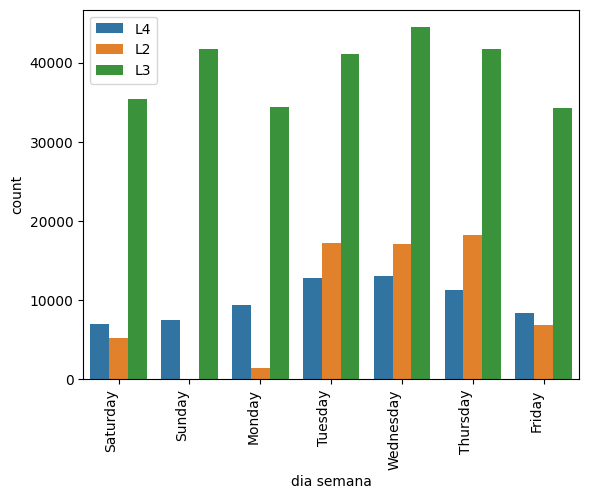

In [38]:
sns.countplot(data=data2_sample, x="dia semana", hue='linea')
plt.xticks(rotation= 90, ha="right")
plt.legend(loc='upper left') 
plt.show()

## ¿cuanta infomacion hay de cada variable?





In [51]:
data2_sample.groupby('linea')['equipo'].value_counts()

linea  equipo             
L2     L2_MIXER_KB_103_QIT     53531
       L2_ENCH_B120_PIT        11787
       L2_MIXER_KB_121_TT        382
       L2_MED_T_C2MIX            212
       L2_MED_V_C2MIX              3
       L2_MIXER_REC_ATV            3
L3     L3_MIXER_KB_121_TT     155027
       L3_MIXER_KB_103_QIT     64657
       L3_MED_V_C2MIX          49482
       L3_ENCH_VELOCIDADE       3264
       L3_MIXER_KB_140_TT        293
       L3_MED_T_C2MIX            278
L4     L4_MIXER_KB_841_QIT     59314
       L4_MED_V_C2MIX          10004
       L4_MED_T_C2MIX             17
Name: equipo, dtype: int64

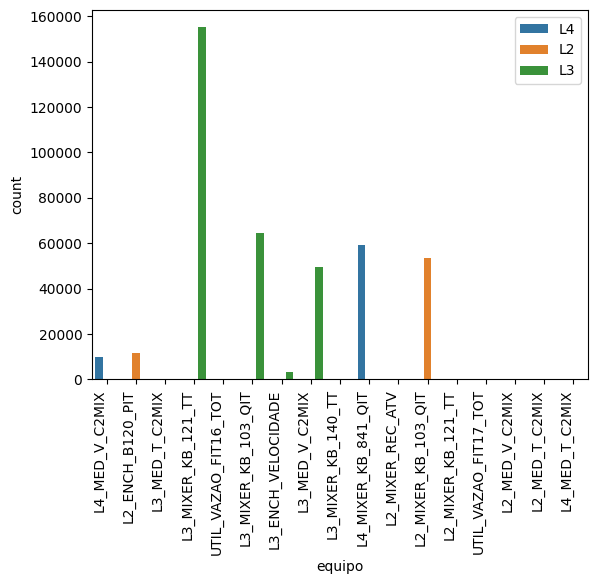

In [40]:
sns.countplot(data=data2_sample, x='equipo', hue="linea")
plt.xticks(rotation= 90, ha="right")
plt.legend(loc='upper right') 
plt.show()

## ¿cómo se distribuyen los valores promedio?

In [47]:
pivotsample.describe()

equipo,L2_ENCH_B120_PIT,L2_MED_T_C2MIX,L2_MED_V_C2MIX,L2_MIXER_KB_103_QIT,L2_MIXER_KB_121_TT,L2_MIXER_REC_ATV,L3_ENCH_VELOCIDADE,L3_MED_T_C2MIX,L3_MED_V_C2MIX,L3_MIXER_KB_103_QIT,L3_MIXER_KB_121_TT,L3_MIXER_KB_140_TT,L4_MED_T_C2MIX,L4_MED_V_C2MIX,L4_MIXER_KB_841_QIT,UTIL_VAZAO_FIT16_TOT,UTIL_VAZAO_FIT17_TOT
count,11787.000000,2.120000e+02,3.000000,53531.000000,382.000000,3.0,3264.000000,2.780000e+02,49482.000000,64657.000000,155027.000000,293.000000,17.000000,10004.000000,59314.000000,145840.000000,3.0
mean,4.887114,3.113998e+06,1.975050,7.285430,18.934389,14.0,17345.586397,5.505674e+06,4059.307828,5.189912,18.515867,40.416127,118694.782353,24.685492,1.851785,3089.322819,0.0
std,0.874186,1.219316e+04,1.601795,0.911312,17.870056,0.0,10257.826869,1.695698e+04,1923.306262,3.209251,11.317037,20.050623,865.787639,24.868343,1.404039,2655.617483,0.0
min,0.000000,3.093186e+06,1.050235,0.000000,8.194540,14.0,0.000000,5.477877e+06,0.000040,0.000000,6.031785,7.832524,117528.900000,0.000009,0.000000,0.000000,0.0
25%,4.607639,3.103840e+06,1.050254,7.381576,10.324252,14.0,10200.000000,5.491221e+06,2956.117500,0.955019,10.413875,21.929840,117908.900000,4.648315,0.374334,983.917900,0.0
50%,4.886140,3.113975e+06,1.050272,7.542628,11.219050,14.0,17300.000000,5.506066e+06,3384.079500,6.331846,13.996230,40.453810,118508.900000,20.136585,3.001516,2459.588000,0.0
75%,5.453269,3.123853e+06,2.437457,7.703154,13.202758,14.0,26000.000000,5.521145e+06,6037.629000,8.239881,24.103855,57.905899,119348.900000,33.814563,3.145974,4593.007500,0.0
max,6.470703,3.135918e+06,3.824643,21.329560,82.558040,14.0,37004.000000,5.535057e+06,9999.000000,10.390900,83.608920,80.882000,120148.900000,179.981900,4.796900,13023.120000,0.0


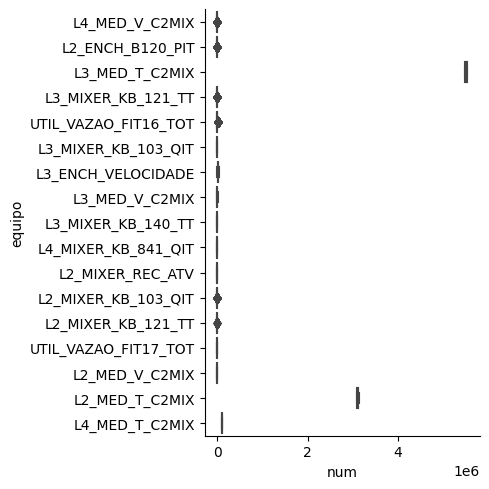

In [67]:
sns.catplot(data=data2_sample, x="num", y="equipo", kind="box")

## pairplot para observar relacion con variable de salida

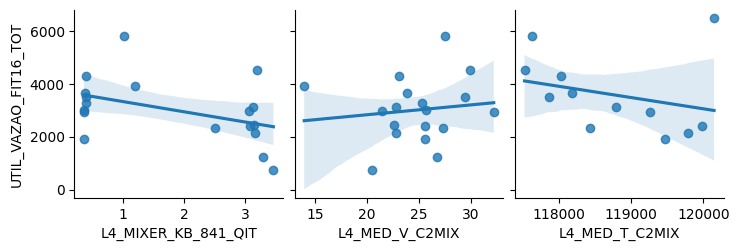

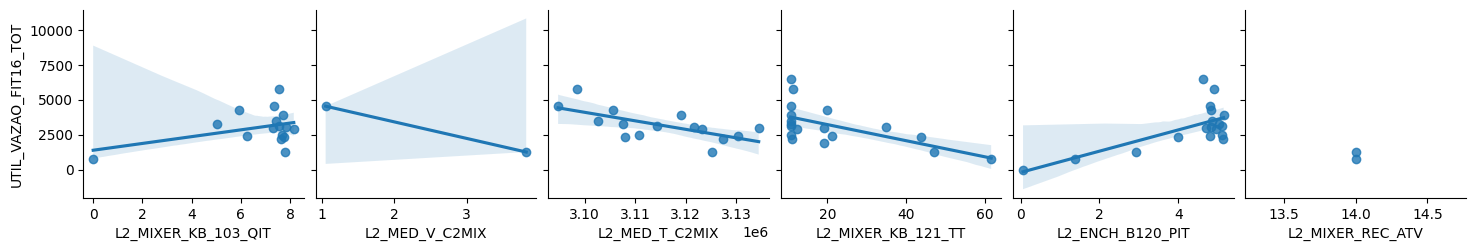

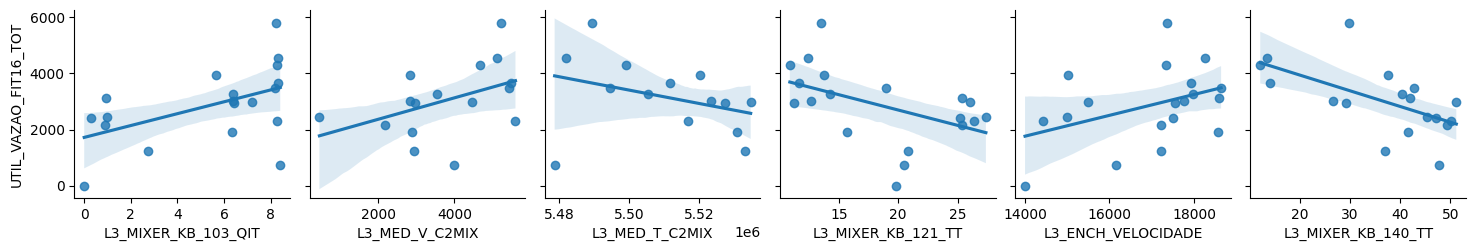

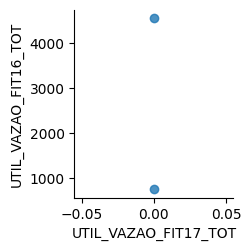

In [74]:
sns.pairplot(pivotbydaymean, x_vars=[ 'L4_MIXER_KB_841_QIT','L4_MED_V_C2MIX', 'L4_MED_T_C2MIX'], 
             y_vars='UTIL_VAZAO_FIT16_TOT',kind='reg')
sns.pairplot(pivotbydaymean, x_vars=['L2_MIXER_KB_103_QIT', 'L2_MED_V_C2MIX', 'L2_MED_T_C2MIX', 'L2_MIXER_KB_121_TT','L2_ENCH_B120_PIT', 'L2_MIXER_REC_ATV'], 
             y_vars='UTIL_VAZAO_FIT16_TOT',kind='reg')
sns.pairplot(pivotbydaymean, x_vars=['L3_MIXER_KB_103_QIT','L3_MED_V_C2MIX','L3_MED_T_C2MIX', 'L3_MIXER_KB_121_TT',  'L3_ENCH_VELOCIDADE',  'L3_MIXER_KB_140_TT'], 
             y_vars='UTIL_VAZAO_FIT16_TOT',kind='reg')
sns.pairplot(pivotbydaymean, x_vars='UTIL_VAZAO_FIT17_TOT', 
             y_vars='UTIL_VAZAO_FIT16_TOT',kind='reg')

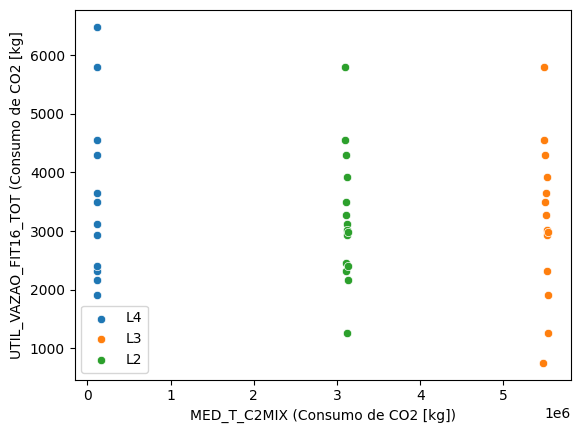

In [72]:
fig, ax = plt.subplots()
sns.scatterplot(data=pivotbydaymean, x='L4_MED_T_C2MIX', y='UTIL_VAZAO_FIT16_TOT' , label='L4')
sns.scatterplot(data=pivotbydaymean, x='L3_MED_T_C2MIX', y='UTIL_VAZAO_FIT16_TOT', label='L3')
sns.scatterplot(data=pivotbydaymean, x='L2_MED_T_C2MIX', y='UTIL_VAZAO_FIT16_TOT', label='L2')
ax.set_xlabel('MED_T_C2MIX (Consumo de CO2 [kg])')
ax.set_ylabel('UTIL_VAZAO_FIT16_TOT (Consumo de CO2 [kg]')
plt.show()

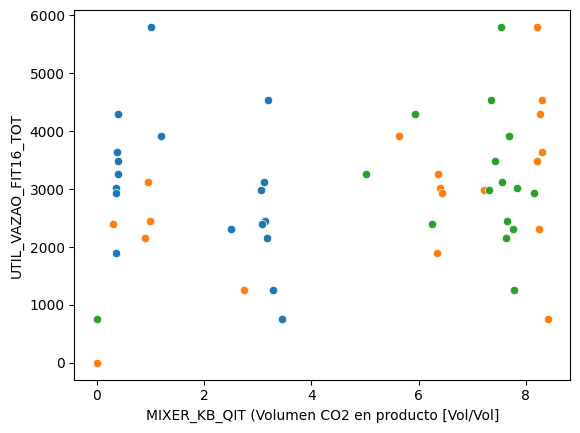

In [74]:
#scatter plot de MIXER_KB
fig, ax = plt.subplots()
sns.scatterplot(data=pivotbydaymean, x='L4_MIXER_KB_841_QIT', y='UTIL_VAZAO_FIT16_TOT', label='')
sns.scatterplot(data=pivotbydaymean, x='L3_MIXER_KB_103_QIT', y='UTIL_VAZAO_FIT16_TOT')
sns.scatterplot(data=pivotbydaymean, x='L2_MIXER_KB_103_QIT', y='UTIL_VAZAO_FIT16_TOT')
ax.set_xlabel('MIXER_KB_QIT (Volumen CO2 en producto [Vol/Vol]')
plt.show()

### agrupar por hora

<ipython-input-136-85953ebf4528>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_L4_MED_T= data2_sample[data2_sample['equipo']=='L4_MED_T_C2MIX'].groupby(pd.Grouper( freq='12H')).mean()
<ipython-input-136-85953ebf4528>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_L3_MED_T= data2_sample[data2_sample['equipo']=='L3_MED_T_C2MIX'].groupby(pd.Grouper( freq='12H')).mean()
<ipython-input-136-85953ebf4528>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only c

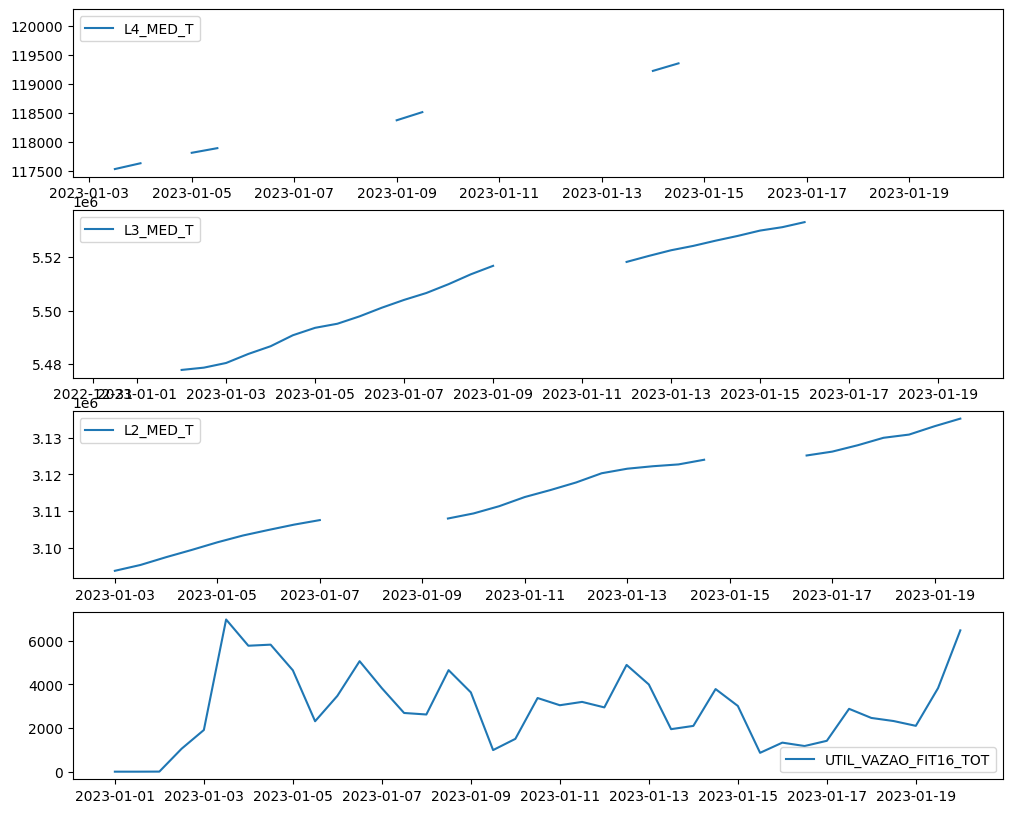

In [136]:
# agrupar por hora
# hourly_UTIL_VAZAO= data2_sample[data2_sample['equipo']=='UTIL_VAZAO_FIT16_TOT'].groupby(pd.Grouper( freq='12H')).mean()
# plt.plot(hourly_UTIL_VAZAO.index,hourly_UTIL_VAZAO['num'])
hourly_L4_MED_T= data2_sample[data2_sample['equipo']=='L4_MED_T_C2MIX'].groupby(pd.Grouper( freq='12H')).mean() 
hourly_L3_MED_T= data2_sample[data2_sample['equipo']=='L3_MED_T_C2MIX'].groupby(pd.Grouper( freq='12H')).mean() 
hourly_L2_MED_T= data2_sample[data2_sample['equipo']=='L2_MED_T_C2MIX'].groupby(pd.Grouper( freq='12H')).mean()

fig, ax = plt.subplots(4,1,figsize=(12, 10))

ax[0].plot(hourly_L4_MED_T.index,hourly_L4_MED_T['num'], label= 'L4_MED_T')
ax[0].legend()
ax[1].plot(hourly_L3_MED_T.index,hourly_L3_MED_T['num'], label= 'L3_MED_T')
ax[1].legend()
ax[2].plot(hourly_L2_MED_T.index,hourly_L2_MED_T['num'], label= 'L2_MED_T')
ax[2].legend()
ax[3].plot(hourly_UTIL_VAZAO.index,hourly_UTIL_VAZAO['num'], label= 'UTIL_VAZAO_FIT16_TOT')
ax[3].legend()
plt.show()

In [ ]:
#sns.pairplot(pivotmod2)

### ¿se pueden quitar variables?

La variable se salida que queremos analizar es:

**ETH_Util_Vazao_FIT16_TOT**, que se refiere al Consumo de CO2 [kg](Salida del tanque)

Considerando estos conteos y la descripción de las variables podrian eliminar:

* la variable ''ETH_Util_Vazao_FIT17_TOT'' no aporta informacion relavante

* la variable ''L2_Mixer_REC_ATV'' no aporta informacion relavante


In [103]:
data2_sample[data2_sample['equipo']=='UTIL_VAZAO_FIT17_TOT']

,equipo,num,date,dia semana,linea
datetime,,,,,
2023-01-02 21:58:07,UTIL_VAZAO_FIT17_TOT,0.0,2023-01-02,Monday,NaN
2023-01-02 23:21:08,UTIL_VAZAO_FIT17_TOT,0.0,2023-01-02,Monday,NaN
2023-01-03 00:46:11,UTIL_VAZAO_FIT17_TOT,0.0,2023-01-03,Tuesday,NaN


In [105]:
data2_sample[data2_sample['equipo']=='L2_MIXER_REC_ATV']

,equipo,num,date,dia semana,linea
datetime,,,,,
2023-01-02 15:10:58,L2_MIXER_REC_ATV,14.0,2023-01-02,Monday,L2
2023-01-02 21:08:08,L2_MIXER_REC_ATV,14.0,2023-01-02,Monday,L2
2023-01-16 16:33:27,L2_MIXER_REC_ATV,14.0,2023-01-16,Monday,L2


# Observaciones:

* La línea que cuenta con más datos para el análisis es la Línea 3
* Los datos de la línea 2 hay días que no tenemos registros. 
* En este analisis, al pivotear el dataset nos damos cuenta hay muchos registros faltantes por fecha. Para corregir esto podemos intentar:
** Hacer un muestreo por fechas u horarios en especifico.
** Revisar en el conjunto de datos original si hay mas informaciás sobre estas variables. 
** Consultar al cliente si existe algún motivo particular por el cual no hay registros (por ejemplo: que alguna línea no haya estado en funcionamiento).
* Al observar las gráficas, se aprecia que la variable de salida `ETH_Util_Vazao_FIT16_TOT` que representa el *Consumo de CO2 - Salida del tanque - Utilidades [kg]* tiene una correlación negativa (aparentemente lineal) con respecto a las variables `L4_MED_T_C2MIX`, `L3_MED_T_C2MIX` y `L2_MED_T_C2MIX` que representan el *Consumo de CO2 [kg] - Carbonatador* de cada línea. Sin embargo es notable que los rangos  en las mediciones por liena no coinciden.
* Se propone hacer un análisis de correlacion y una regresión lineal con las variables de entrada.


